# Import python libs

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

# Logistic Regression Function

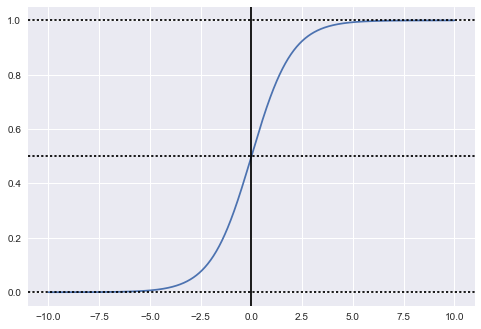

In [3]:
x = np.linspace(-10, 10, 1000)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y)
plt.axhline(0, ls = "dotted", color = "black")
plt.axhline(0.5, ls = "dotted", color = "black")
plt.axhline(1, ls = "dotted", color = "black")
plt.axvline(0, color = "black")

plt.show()

# Logistic Regression on Real Data (iris dataset)

In [4]:
# Read and visualise data set
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
iris.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


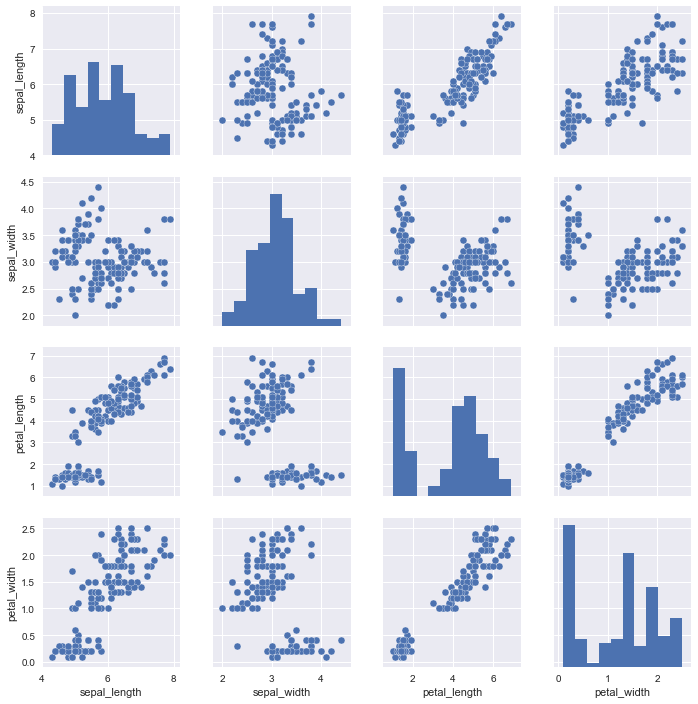

In [13]:
# Show relationships between columns
sns.pairplot(iris)

In [5]:
iris_model = LogisticRegression(C = 1000) # C - regularization parameter

test_indices = np.random.randint(0, len(iris), 5)  
train_indices = np.delete(np.arange(len(iris)), test_indices)

iris_test = iris.ix[test_indices] # get 5 random test items
iris_train = iris.ix[train_indices] # the rest is for model training

predictor_attrs = iris_train.drop("class", axis = 1)
iris_model.fit(predictor_attrs, iris_train["class"])


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
predicted = iris_model.predict(iris_test.drop("class", axis = 1)) # pass the test data without results
predicted_proba = iris_model.predict_proba(iris_test.drop("class", axis = 1))

print(predicted)
print(iris_test["class"])

['Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor']
28         Iris-setosa
119     Iris-virginica
41         Iris-setosa
54     Iris-versicolor
68     Iris-versicolor
Name: class, dtype: object


In [10]:
print(predicted_proba)

[[  9.07967106e-01   9.20328945e-02   2.39592800e-20]
 [  1.05068565e-09   5.01481334e-01   4.98518665e-01]
 [  5.65646195e-01   4.34353805e-01   6.99788912e-17]
 [  1.06186410e-06   9.83398900e-01   1.66000379e-02]
 [  5.15705280e-08   8.19724232e-01   1.80275717e-01]]
